#**2-Classifying newswires: a multiclass classification example**
Network to classify Reuters newswires into 46 mutually
exclusive topics. Because you have many classes, this problem is an instance of multiclass classification; and because each data point should be classified into only one category, the problem is more specifically an instance of single-label, multiclass classification.
If each data point could belong to multiple categories (in this case, topics), you’d be
facing a multilabel, multiclass classification problem.

There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.


In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


You can vectorize the data with the exact same code as in the previous example.(IMDB)

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. 

In this case, one-hot encoding of
the labels consists of embedding each label as an all-zero vector with a 1 in the place of
the label index. 

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In Keras we can encoding as in this easy way:


```
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
```



In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



*   The network with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
*   The last layer uses a softmax activation. It means the network will output a probability distribution over the 46 different output classes—for every input sample, the network will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is categorical_crossentropy. It measures
the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing
the distance between these two distributions, you train the network to output something as close as possible to the true labels.



In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 153us/step - loss: 2.4842 - accuracy: 0.5337 - val_loss: 1.6560 - val_accuracy: 0.6560
Epoch 2/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.3562 - accuracy: 0.7145 - val_loss: 1.2777 - val_accuracy: 0.7230
Epoch 3/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.0219 - accuracy: 0.7788 - val_loss: 1.1190 - val_accuracy: 0.7620
Epoch 4/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.8012 - accuracy: 0.8282 - val_loss: 1.0609 - val_accuracy: 0.7520
Epoch 5/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.6425 - accuracy: 0.8639 - val_loss: 0.9382 - val_accuracy: 0.7980
Epoch 6/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.5133 - accuracy: 0.8915 - val_loss: 0.9059 - val_accuracy: 0.8170
Epoch 7/20
7982/7982 [==============================] - 1s 113us/step - loss

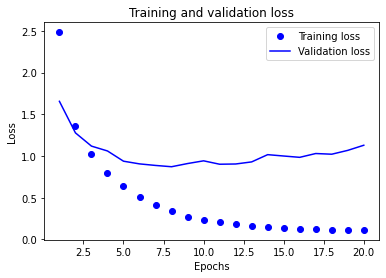

In [11]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

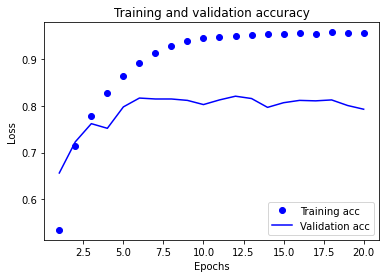

In [16]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The importance of having sufficiently large intermediate layers:

We mentioned earlier that because the final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what
happens when you introduce an information bottleneck by having intermediate layers
that are significantly less than 46-dimensional: for example, 4-dimensional.

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 179us/step - loss: 3.3779 - accuracy: 0.1367 - val_loss: 2.8441 - val_accuracy: 0.2470
Epoch 2/20
7982/7982 [==============================] - 1s 164us/step - loss: 2.4530 - accuracy: 0.2730 - val_loss: 2.0764 - val_accuracy: 0.3140
Epoch 3/20
7982/7982 [==============================] - 1s 165us/step - loss: 1.7499 - accuracy: 0.4509 - val_loss: 1.6751 - val_accuracy: 0.5150
Epoch 4/20
7982/7982 [==============================] - 1s 167us/step - loss: 1.4243 - accuracy: 0.5982 - val_loss: 1.4714 - val_accuracy: 0.6750
Epoch 5/20
7982/7982 [==============================] - 1s 168us/step - loss: 1.1775 - accuracy: 0.7106 - val_loss: 1.3539 - val_accuracy: 0.6930
Epoch 6/20
7982/7982 [==============================] - 1s 168us/step - loss: 1.0229 - accuracy: 0.7469 - val_loss: 1.3091 - val_accuracy: 0.7080
Epoch 7/20
7982/7982 [==============================] - 1s 166us/step - loss

The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it.

**Summery2:**


*    If you’re trying to classify data points among N classes, your network should end
with a Dense layer of size N.

*   In a single-label, multiclass classification problem, your network should end
with a softmax activation so that it will output a probability distribution over the
N output classes.
*   There are two ways to handle labels in multiclass classification:

  *   Encoding the labels via categorical encoding (also known as one-hot encoding) and using
  *   Encoding the labels via categorical encoding (also known as one-hot encoding) and using

*   If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your network due to intermediate layers
that are too small.

